### Keyword Cluster Wordcloud
This notebook demonstrates keyword clustering and wordloud generation from fasttext word embeddings.

In [8]:
import pandas as pd
from wordcloud import WordCloud
import stanza
import fasttext as ft
import numpy as np
from tqdm.notebook import tqdm
from sklearn.cluster import AffinityPropagation
stanza.download("en")

ConnectionError: HTTPConnectionPool(host='nlp.stanford.edu', port=80): Max retries exceeded with url: /software/stanza/1.2.0/en/default.zip (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002536BA54308>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [4]:
# load data
df = pd.read_csv('res/bbc.csv')

In [5]:
df.label.unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [6]:
sample = df[df.label == 'tech'].sample(10)

In [ ]:
# load stanza
model_stanza = stanza.Pipeline(
    "en",
    processors="tokenize,pos,lemma",
    use_gpu=False,
    pos_batch_size=200,
    tokenize_pretokenized=False,
    logging_level="ERROR",
)

In [ ]:
# get all tokens
raw = []
for text in tqdm(df.comment.values[:100]):
    doc = model_stanza(text)
    raw.extend([(word.pos, word.lemma) for sent in doc.sentences for word in sent.words])

In [ ]:
# lemmatize and pick only certain POS
tokens = list(map(lambda x: x[1], filter(lambda x: x[0] in ['ADJ', 'NOUN', 'VERB'], set(raw))))

In [ ]:
###

In [4]:
with open('tokens', 'rb') as f:
    tokens = pickle.load(f)

In [5]:
# load ft
model_ft = ft.load_model('cc.de.300.bin')

In [6]:
# get embeddings
X = []
for t in tqdm(tokens):
    X.append(model_ft[t])

In [7]:
X = np.array(X)

In [10]:
# get cosine similarity for embeddings
from sklearn.metrics.pairwise import cosine_similarity
# similarities = cosine_similarity(X)

In [ ]:
with open('similarities', 'wb') as f:
    pickle.dump(similarities, f)

In [36]:
with open('similarities', 'rb') as f:
    similarities = pickle.load(f)

In [ ]:
# cluster the tokens
af = AffinityPropagation(
    affinity="precomputed",
    random_state=42,
#     preference=-1,
)
# Fit clusterer.
labels = af.fit_predict(similarities)

In [ ]:
with open('af', 'wb') as f:
    pickle.dump(af, f)

In [8]:
with open('af', 'rb') as f:
    af = pickle.load(f)

In [9]:
tokens = np.array(tokens)

In [12]:
# 'cluster the centroids'
centroids = []
centroids_toks = []
for l, i in enumerate(af.cluster_centers_indices_):
    center = X[i]
    centroids.append(center)
    tok_center = tokens[i]
    centroids_toks.append(tok_center)

In [16]:
centroids = np.array(centroids)
# cluster the tokens
af_centroids = AffinityPropagation(
    affinity="precomputed",
    random_state=42,
#     preference=-1,
)
# Fit clusterer.
labels_centroids = af.fit_predict(cosine_similarity(centroids))

In [25]:
max(labels_centroids)

13

In [29]:
# for each cluster, use centroid as label and 
# get distance from centroid for all tokens
ret = {}
for l in range(max(labels_centroids)):
#     center = centroids[i]
#     tok_center = centroids_toks[i]
    members = centroids[labels_centroids == l]
    tok_members = np.array(centroids_toks)[labels_centroids == l]
    print(tok_members.tolist())
    print()
#     ret[tok_center] = {}
#     for t, e in zip(tok_members, members):
#         if not t == tok_center:
#             ret[tok_center][t] = cosine(center, e)

['Überprüfung', 'bezüglich', 'Unterstützung', 'Krankschreibung', 'Umstrukturierung', 'Aussage', 'Durchstellung', 'Zuordnung', 'Wechsel', 'Notwendigkeit', 'Zahlung', 'Realisierung', 'Reduzierung', 'Veröffentlichung', 'Regelung', 'Abrechnung', 'Umbau', 'Bestätigung', 'Fragestellung', 'Vergleich', 'Befragung', 'Erläuterung']

['system', 'Management', 'Projekt', 'Konzept', 'Begrifflichkeit', 'Bild', 'Arbeitsgruppe', 'Projektverlaufs', 'Struktur', 'Werkzeug', 'Verhalten', 'Angebot', 'Veranstaltung', 'Gespräch', 'Homepage', 'Vorreiter', 'Ziel', 'Vorschlag', 'Leistungspaket', 'Denkweise', 'Ende', 'Zeitplanung', 'Bericht', 'Aspekt', 'Entscheidungsstruktur']

['teuerst', 'zuverlässiger', 'Umweltbewußt', 'Praktischere', 'Andere', 'Externe', 'Einfache', 'Günstigere', 'ergebnisorientierter', 'Organisations-', 'zusätzliche/unangenehm', 'hilfsbereit,kompetent', 'sachlicht', 'Kundenfreundliches']

['²', 'zp', 'u', 'S', 'zB', 'Ok']

['Dienststelle', 'Sachbearbeiter', 'Nutzer', 'Arbeitsbelastung', 'Sen

In [12]:
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

In [31]:
# define categories of clusters based on the 
# centroid clustering
support = ['Überprüfung', 'bezüglich', 'Unterstützung', 'Krankschreibung', 'Umstrukturierung', 'Aussage', 'Durchstellung', 'Zuordnung', 'Wechsel', 'Notwendigkeit', 'Zahlung', 'Realisierung', 'Reduzierung', 'Veröffentlichung', 'Regelung', 'Abrechnung', 'Umbau', 'Bestätigung', 'Fragestellung', 'Vergleich', 'Befragung', 'Erläuterung']

management = ['system', 'Management', 'Projekt', 'Konzept', 'Begrifflichkeit', 'Bild', 'Arbeitsgruppe', 'Projektverlaufs', 'Struktur', 'Werkzeug', 'Verhalten', 'Angebot', 'Veranstaltung', 'Gespräch', 'Homepage', 'Vorreiter', 'Ziel', 'Vorschlag', 'Leistungspaket', 'Denkweise', 'Ende', 'Zeitplanung', 'Bericht', 'Aspekt', 'Entscheidungsstruktur']

workplace = ['Dienststelle', 'Sachbearbeiter', 'Nutzer', 'Arbeitsbelastung', 'Sender', 'Arbeit', 'Mitarbeiter', 'Mitarbeiter/Innen', 'Hotline', 'Stellenausschreibung', 'Personalrat', 'Unternehmenskultur', 'Bürger', 'Mitarbeiter/innen', 'Berater', 'Mensch', 'Unternehmen', 'Aufgabenbereiche', 'Tätigkeitsbereich', 'Mails', 'Mitarbeiterin', 'Personalvermittler', 'Führungsebene', 'Projektleiter', 'Stadtverwaltung']

energy = ['Atomkraftwerke', 'Energieverbrauch', 'Elektromobilität', 'Strom', 'Armut', 'Solarenergie', 'Energieversorger', 'Braunkohle', 'Stromanbieter', 'Stromerzeugung', 'Preissteigerung', 'Atomstromfrei', 'Energie', 'Heizung', 'Stromausfall']

communication = ['Kommunikation', 'Arroganz', 'Leistungsbereitschaft', 'Bereich', 'Nachhaltigkeit', 'Flexibilität', 'Transparenz', 'Bürgerfreundlichkeit', 'Erwartung', 'Relevanz', 'Fachwissen', 'Enthusiasmus', 'Kompetenz', 'Sprache', 'Vernetzung', 'Verantwortung', 'Vertrauen', 'Qualität', 'Ausbildung', 'Bestnote', 'Kundenorientierung', 'Ehrlichkeit', 'Hierarchie']

customer = ['verbesserung', 'mail', 'Informationen', 'kundenbetreuung', 'zeit', 'leute', 'Orientierungs', 'probleme', 'neukunden', 'anbieter', 'erklärung', 'selbstverständnis', 'informationen', 'News']

In [40]:
# organize into a dict
topics = {
    "support": {
        "centroids": support,
        "members": {},
    },
    "management": {
        "centroids": management,
        "members": {},
    },
    "workplace": {
        "centroids": workplace,
        "members": {},
    },
    "energy": {
        "centroids": energy,
        "members": {},
    },
    "communication": {
        "centroids": communication,
        "members": {},
    },
    "customer": {
        "centroids": customer,
        "members": {},
    },
}

In [38]:
labels = af.labels_

In [41]:
# for each cluster, use centroid as label and 
# get distance from centroid for all tokens
for l, i in enumerate(af.cluster_centers_indices_):
    center = X[i]
    tok_center = tokens[i]
    members = X[labels == l]
    tok_members = tokens[labels == l]
    for topic, d in topics.items():
        if tok_center in d['centroids']:
            for t, e in zip(tok_members, members):
                topics[topic]['members'].update({t: 1 - cosine(center, e)})


In [42]:
# check output
topics

{'support': {'centroids': ['Überprüfung',
   'bezüglich',
   'Unterstützung',
   'Krankschreibung',
   'Umstrukturierung',
   'Aussage',
   'Durchstellung',
   'Zuordnung',
   'Wechsel',
   'Notwendigkeit',
   'Zahlung',
   'Realisierung',
   'Reduzierung',
   'Veröffentlichung',
   'Regelung',
   'Abrechnung',
   'Umbau',
   'Bestätigung',
   'Fragestellung',
   'Vergleich',
   'Befragung',
   'Erläuterung'],
  'members': {'Qualitätsprüfung': 0.5792980790138245,
   'Überarbeitung': 0.6108357310295105,
   'Überprüfung': 1.0,
   'Aktualisierung': 0.5708776712417603,
   'Bewertung': 0.4465539753437042,
   'FBt': 0.194098562002182,
   'Erfassung': 0.6364107131958008,
   'Klärung': 0.6370730400085449,
   'Aufbereitung': 0.5577201843261719,
   'Abarbeitung': 0.5500870943069458,
   'Kontrolle': 0.6039009690284729,
   'Beeinflussung': 0.5249005556106567,
   'Setzung': 0.4909064769744873,
   'Bearbeitung': 0.5872132778167725,
   'Freischaltung': 0.5132185220718384,
   'Abwägung': 0.48075008392

In [29]:
# cluster the tokens raw again
# for each cluster, use centroid as label and 
# get distance from centroid for all tokens
ret = {}
for l, i in enumerate(af.cluster_centers_indices_):
    center = X[i]
    tok_center = tokens[i]
    members = X[af.labels_ == l]
    tok_members = tokens[af.labels_ == l]
    ret[tok_center] = {}
    for t, e in zip(tok_members, members):
        if not t == tok_center:
            ret[tok_center][t] = 1- cosine(center, e)

In [30]:
ret

{'entscheiden': {'wählen': 0.6835664510726929,
  'bevorzugen': 0.5856538414955139,
  'Überlegen': 0.5224207043647766,
  'erwägen': 0.5234929323196411,
  'überlegt': 0.5987023711204529,
  'verantworten': 0.5049726366996765,
  'Wahl': 0.4887830317020416,
  'überlegen': 0.6889386773109436,
  'vorschreiben': 0.5634812712669373,
  'aussuchen': 0.7152095437049866,
  "\\'": nan,
  'treffen': 0.571137547492981,
  'ausrechnen': 0.5133825540542603,
  'Abwägen': 0.42525535821914673,
  'bereuen': 0.48783767223358154,
  'abstimmen': 0.6083289980888367,
  'vorziehen': 0.5696797370910645,
  'vorschlagen': 0.5731619596481323,
  'Bevorzugen': 0.47968652844429016,
  'auswählen': 0.5789303183555603,
  'Entscheiden': 0.7339667081832886,
  'entschieden': 0.7376087307929993,
  'überlassen': 0.6113606095314026,
  'bestreiten': 0.5725920796394348,
  '„1': nan,
  'beschließen': 0.5597536563873291,
  'bestimmen': 0.6817672848701477},
 'Vertrag': {'Vertragslaufzeit': 0.5351373553276062,
  'Vertragspartner': 0.52

In [31]:
# reorganize the tokens
for k, v in ret.items():
    ret[k] = dict(sorted([(tok, dist) for tok, dist in v.items() if dist > 0], key=lambda x: x[1], reverse=True)[:20])

In [32]:
ret

{'entscheiden': {'entschieden': 0.7376087307929993,
  'Entscheiden': 0.7339667081832886,
  'aussuchen': 0.7152095437049866,
  'überlegen': 0.6889386773109436,
  'wählen': 0.6835664510726929,
  'bestimmen': 0.6817672848701477,
  'überlassen': 0.6113606095314026,
  'abstimmen': 0.6083289980888367,
  'überlegt': 0.5987023711204529,
  'bevorzugen': 0.5856538414955139,
  'auswählen': 0.5789303183555603,
  'vorschlagen': 0.5731619596481323,
  'bestreiten': 0.5725920796394348,
  'treffen': 0.571137547492981,
  'vorziehen': 0.5696797370910645,
  'vorschreiben': 0.5634812712669373,
  'beschließen': 0.5597536563873291,
  'erwägen': 0.5234929323196411,
  'Überlegen': 0.5224207043647766,
  'ausrechnen': 0.5133825540542603},
 'Vertrag': {'Vertag': 0.7276957035064697,
  'Jahresvertrag': 0.6829641461372375,
  'Vertragsverlängerung': 0.653590738773346,
  'Rahmenvertrag': 0.6073375940322876,
  'Gasvertrag': 0.6011700630187988,
  'Knebelvertrag': 0.5921339392662048,
  'Vertragsabschluß': 0.5853746533393

In [16]:
def load_german_sentiment_dictionary() -> dict:
    """
    Loads a german sentiment dictionary
    from a csv file.

    Returns
    ---------
        func : dict
            Callable for getting
            german sentiment when passing
            an arbitrary query term.
    """
    df = pd.read_csv("sentiment_DE.csv")
    dictionary = {}
    for item in df.itertuples():
        dictionary[item.word] = item.sentiment

    return dictionary

sentiment_model = load_german_sentiment_dictionary()

In [17]:
def sentiment_callable(word, *args, **kwargs):
    """
    Function to return sentiment
    color-code based on
    sentiment label.
    """
    try:
        color = (
            (0, 102, 0)
            if sentiment_model[word] == "POS"
            else (255, 0, 0)
        )
    except KeyError:
        color = (160, 160, 160)
    return color

OSError: [Errno 22] Invalid argument: 'img/List|Liste.png'

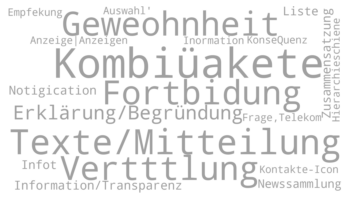

In [33]:
# producing wordclouds the old way again
for k, v in ret.items():
    try:
        wc = WordCloud(
            background_color="white",
            width=1920,
            height=1080,
            color_func=sentiment_callable,
        )
        wc.generate_from_frequencies(v)
        # plot wordcloud
        plt.axis("off")
        plt.imshow(wc, interpolation="bilinear")
        save_path = f"img/{k.replace('/', '')}.png"
        wc.to_image().save(save_path)
    
    except ValueError:
        pass

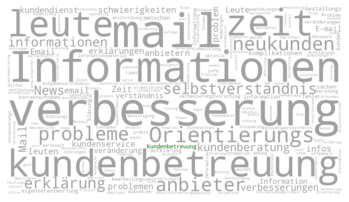

In [45]:
# produce labeled wordcloud for each 'topic'
# using the distance of each token
# to the centroid
for k, v in topics.items():
    try:
        wc = WordCloud(
            background_color="white",
            width=1920,
            height=1080,
            color_func=sentiment_callable,
        )
        wc.generate_from_frequencies(v['members'])
        # plot wordcloud
        plt.axis("off")
        plt.imshow(wc, interpolation="bilinear")
        save_path = f"img/{k.replace('/', '')}.png"
        wc.to_image().save(save_path)
    
    except ValueError:
        pass

In [47]:
with open('topics', 'wb') as f:
    pickle.dump(topics, f)